# Boston Housing DataSet


In [31]:
import sklearn as skl
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("C:/Users/Harshavardhan/Downloads/housing.csv")

In [12]:
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
X=df.drop('MEDV',axis=1)
Y=df['MEDV']

In [18]:
X.shape


(506, 13)

In [19]:
Y.shape


(506,)

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [24]:
bestFeatures=SelectKBest(score_func=f_regression,k='all')
fit=bestFeatures.fit(X,Y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat((dfcolumns,dfscores),axis=1)

In [25]:
featureScores


,0,0
0,CRIM,89.486115
1,ZN,75.257642
2,INDUS,153.954883
3,CHAS,15.971512
4,NOX,112.591480
5,RM,471.846740
6,AGE,83.477459
7,DIS,33.579570
8,RAD,85.914278
9,TAX,141.761357


In [28]:
from sklearn.ensemble import ExtraTreesRegressor

In [30]:
model=ExtraTreesRegressor()
model.fit(X,Y)
model.feature_importances_

array([0.03110132, 0.00360489, 0.04386315, 0.01183088, 0.04295528,
       0.29319937, 0.01759126, 0.03080119, 0.02012836, 0.0377828 ,
       0.05003129, 0.01864255, 0.39846768])

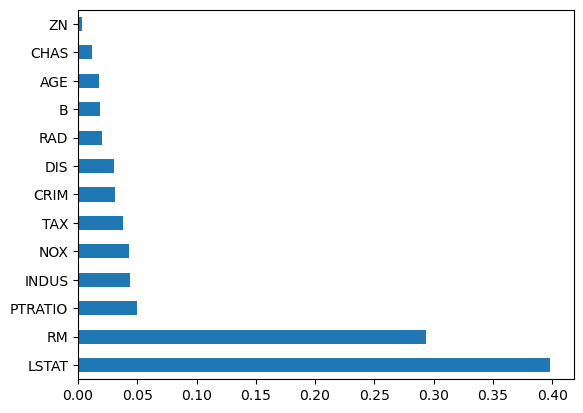

In [32]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(13).plot(kind='barh')
plt.show()

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [55]:
lr=GradientBoostingRegressor()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.3)
lr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [56]:
y_pred=lr.predict(X_test)

In [57]:
print(r2_score(Y_test,y_pred))

0.8471097389755217


In [60]:
user_input=np.array([[0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03]])
y_pred=lr.predict(user_input)
print(y_pred)

[34.61009839]


C:\Users\Harshavardhan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
